# 1. Dataset & Problem Definition

In this classification project, we're going to try to create a highly accurate machine learning model by using different methods to predict whether patients have heart disease or not.

The dataset that we're going to use is Heart Disease dataset which is provided by UCI. You can find the dataset and more at the webpage given below:

https://archive.ics.uci.edu/dataset/45/heart+disease

# 2. Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# 3. Libraries & Importing the Dataset

In [38]:
# Regular Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sci-kit Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Sci-kit Model Evaluation Libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

# Sci-kit Metrics Libraries
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
# Sci-kit Scaler Libraries
from sklearn.preprocessing import StandardScaler

In [2]:
df_ = pd.read_csv(r"C:\Users\myboz\development\datasets\uci_heart_disease.csv")
df = df_.copy()

In [3]:
df.shape

(303, 14)

Our data contains 303 records and 14 columns, that we can say we have 13 features for predicting target value.

# 4. Exploratory Data Analysis (EDA)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In the dataset, there 165 patients have heart disease and 138 patients don't have heart disease. We can see the results as a bar plot.

<Axes: xlabel='target'>

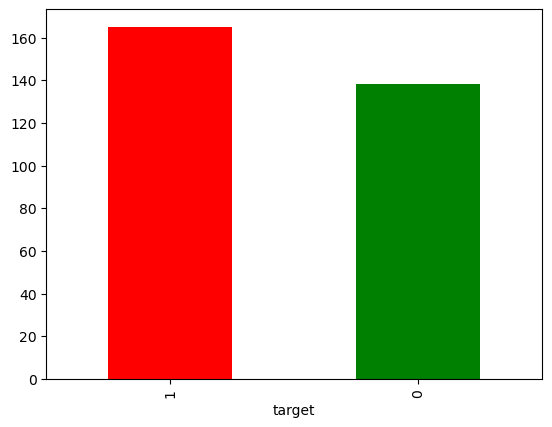

In [7]:
df['target'].value_counts().plot(kind = 'bar', color = ['red', 'green'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As we can see, any missing values are observed and all columns have numeric data types so we will not have to create a dummy set for this data. But let's look for the missing values by using related functions too.

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

Since 1 represents males and 0 represent females for the sex column, we can see there are 207 males and 96 females in the dataset. Let's compare them with the target column.

In [12]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


According to the comparison, heart diseasement possibility for females higher than males. To see this exploration in a better way, we can plot this crosstab.

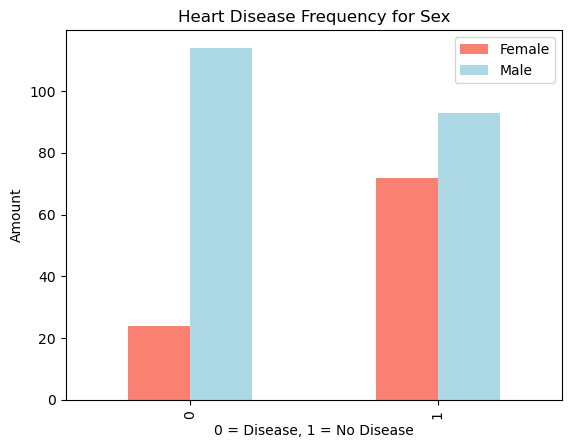

In [13]:
pd.crosstab(df['target'], df['sex']).plot(kind = 'bar', fig = (8,4), color = ['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = Disease, 1 = No Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.show()

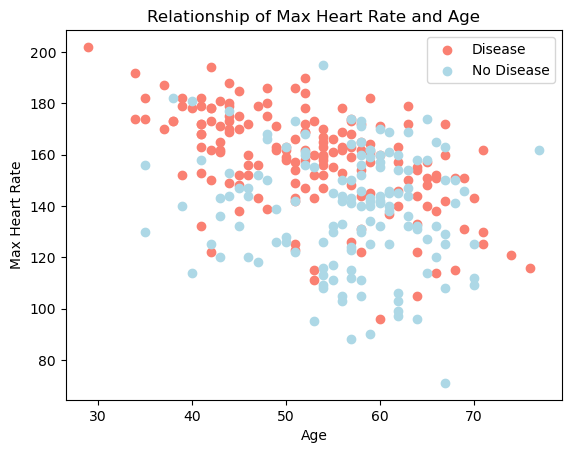

In [14]:
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = 'salmon')

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'lightblue')

plt.title('Relationship of Max Heart Rate and Age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show()

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


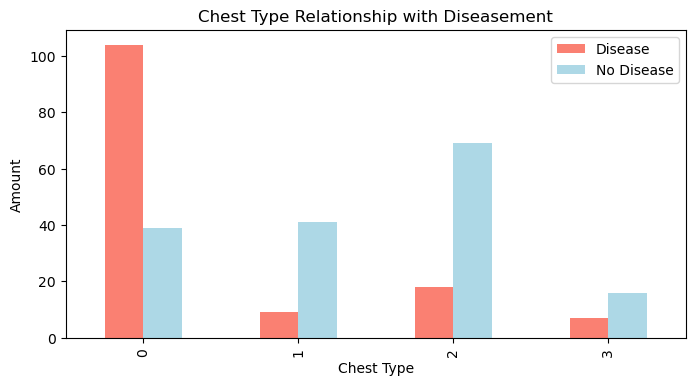

In [16]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (8,4), color = ['salmon', 'lightblue'])

plt.title('Chest Type Relationship with Diseasement')
plt.xlabel('Chest Type')
plt.ylabel('Amount')
plt.legend(['Disease', 'No Disease'])
plt.show()

In [17]:
import sys
print(sys.version)

3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]


(14.5, -0.5)

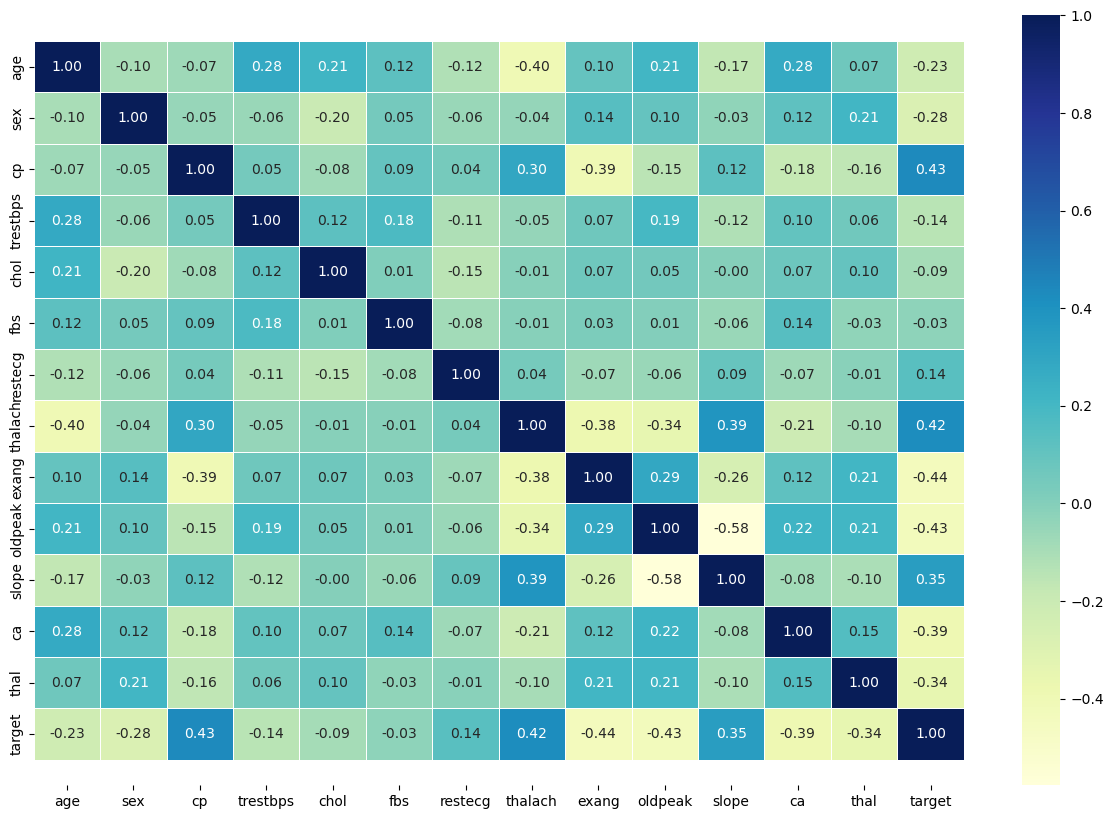

In [18]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap = 'YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x = df.drop(columns=['target'], axis = 1)
y = df['target']

In [23]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Let's split data into train and test sets. We can take 20% of data as test set and since it is a classification problem, stratify parameter given as y. To get same results, we are giving 20 value for random_state parameter.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 20)

In [26]:
len(y_train)

242

Now we can create a pipeline to evaluate model selection process. By providing a pipeline, we are going to try 4 different machine learning models with different parameter values via Grid Search. A a cross validation method, we are going to use KFold (stratified) with 5 splits.

We are going to use 4 machine learning models given below:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. Boosting Classifier 

In [29]:
pipe = Pipeline([('scaler', StandardScaler()), ('Classifier', RandomForestClassifier())])

search_space = [
    {'Classifier': [LogisticRegression(solver='liblinear')],
     'Classifier__C': np.logspace(-4, 4, 100),
     'Classifier__penalty':['l1','l2']
    },
    {'Classifier': [KNeighborsClassifier()],
     'Classifier__n_neighbors':np.arange(1,10)
    },
    {'Classifier': [RandomForestClassifier(random_state=20)],
     'Classifier__n_estimators': [300,400,500],
     'Classifier__max_features': np.arange(1,10)
    },
    {'Classifier': [GradientBoostingClassifier(random_state=10)],
     'Classifier__n_estimators': [100, 500, 1000],
     'Classifier__learning_rate':[0.001,0.01,0.1]
    }
]

clf = GridSearchCV(pipe, search_space, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3), verbose=0, scoring='accuracy')

best_model = clf.fit(x_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   LogisticRegression(C=0.1176811952434999, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': LogisticRegression(C=0.1176811952434999, penalty='l1', solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__C': 0.1176811952434999,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l1',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

According to GridSearch results, it seems the best model is Logistic Regression. Now we can try the model to predict y values with given parameter value C=0.1176811952434999.

In [30]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
model = LogisticRegression(C=0.1176811952434999, penalty='l1', solver='liblinear')
model.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1176811952434999, penalty='l1', solver='liblinear')

In [32]:
y_preds = model.predict(x_test_scaled)

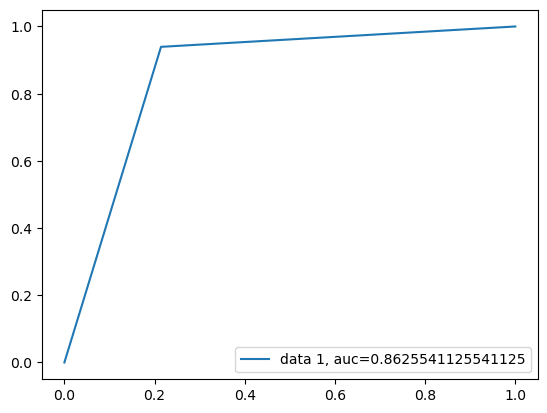

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)

plt.plot(fpr, tpr, label = 'data 1, auc=' + str(auc))
plt.legend(loc = 4)
plt.show()

In [41]:
print(confusion_matrix(y_test, y_preds))

[[22  6]
 [ 2 31]]


In [40]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [42]:
model.coef_

array([[-0.04635026, -0.35879013,  0.48576127, -0.04553852,  0.        ,
         0.        ,  0.04712729,  0.43740971, -0.21570936, -0.41963898,
         0.0689088 , -0.48974055, -0.30804457]])

In [43]:
feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict

{'age': -0.04635025706231766,
 'sex': -0.35879013251066055,
 'cp': 0.48576127020721943,
 'trestbps': -0.04553851735525915,
 'chol': 0.0,
 'fbs': 0.0,
 'restecg': 0.047127293087647265,
 'thalach': 0.43740970793913597,
 'exang': -0.21570936003980637,
 'oldpeak': -0.4196389834034521,
 'slope': 0.06890880242733682,
 'ca': -0.48974055051333504,
 'thal': -0.3080445712180197}

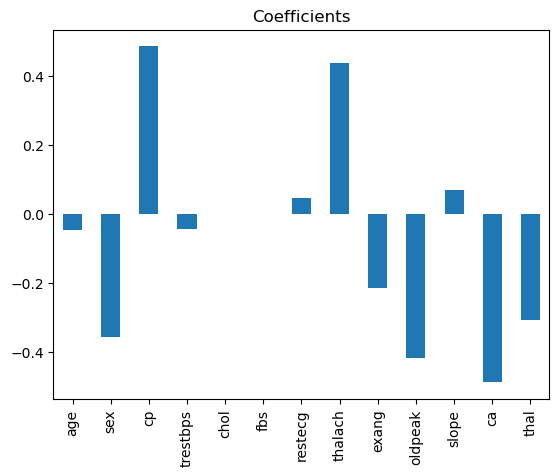

In [44]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Coefficients", legend=False);